In [2]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors as m2colors
import seaborn as sns
from pylab import cm
import plotly
import plotly.graph_objects as go

import json
import os
import sys
import re

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

128
    prime   type  primestiff  relaxstiff  relaxation time    units   YAP  RUNX2
0       0  stiff          10          10              -48  control  88.9   88.7
4       0   soft           2           2              384  control  10.6    3.0
8     240     hr          10           2               24       hr  77.3   64.3
9     240     hr          10           2              120       hr  75.3   56.0
10    240     hr          10           2              240       hr  69.7   62.7
2.061038442126514
4.897349840254641
0.12644902914571854


/home/ccprice/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


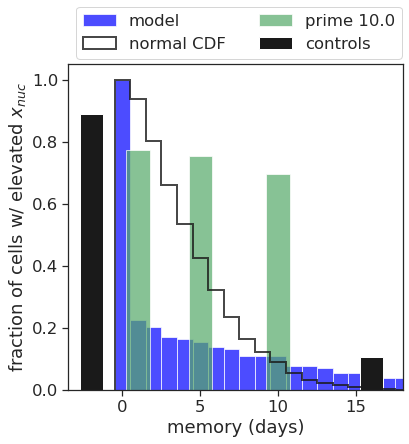

In [8]:
label = 671
ptime = 240
bins = np.arange(-0.5,30.,1.)

fig, ax = plt.subplots(1,1,figsize=(6,6))

# memory = np.load('../figures_v2/figure6_exp_fits/'+ str(ptime) +'.N127.npy')
memory = np.load('./noise_results_mswitch/'+ str(label) + '.P' + str(ptime) +'.N127.npy')
print(len(memory))
ax.hist(memory / 24, density=True, cumulative=-1, bins=bins, color='blue', alpha = 0.7, label='model');

expdata = pd.read_excel('../experiments/bar_plot.xlsx')

subdata = expdata.loc[expdata['prime'].isin([0,ptime])]
subdata.at[subdata['type'] == 'soft', 'relaxation time'] = 16 * 24 # np.amax(bins * 24) + 3*24
subdata.at[subdata['type'] == 'stiff', 'relaxation time'] = -2 * 24
print(subdata)

ax.bar(subdata.loc[subdata['units']=='hr','relaxation time'] / 24, subdata.loc[subdata['units']=='hr','YAP']/100.,
       width=1.5, color='g', alpha=0.7, label='prime '+str(ptime/24.))
ax.bar(subdata.loc[subdata['units']=='control','relaxation time'] / 24, subdata.loc[subdata['units']=='control','YAP']/100.,
       width=1.5, color='k', alpha=1., label='controls')
# plt.bar(subdata['relaxation time'] / 24, subdata['RUNX2']/100., color='r', alpha=0.7)

N = 1500
gausscompare = np.abs(np.random.normal(np.mean(memory/24), np.std(memory/24), N))
# gausscompare = np.random.normal(np.mean(memory/24), np.std(memory/24), N)
# gausscompare[gausscompare < 0.] = 0.
print(np.mean(memory/24))
print(np.std(memory/24))
print(np.std(memory/24)/np.sqrt(N))

ax.hist(gausscompare, density=True, cumulative=-1, bins=bins, label='normal CDF',
         histtype='step', alpha=0.8, color='k', linewidth=2.)

ax.set_xlim([-3.5,18])
ax.set_xlabel('memory (days)')
ax.set_ylabel('fraction of cells w/ elevated $x_{nuc}$')
ax.legend(bbox_to_anchor=(0, 1.2), loc='upper left', ncol=2)

128
   prime   type  primestiff  relaxstiff  relaxation time    units   YAP  RUNX2
0      0  stiff          10          10              -36  control  88.9   88.7
4      0   soft           2           2              192  control  10.6    3.0
5    168     hr          10           2               24       hr  56.3   31.7
6    168     hr          10           2               72       hr  44.0   30.0
7    168     hr          10           2              120       hr  35.7   12.7
2.811149403874814
5.0058616831695755
0.12925079288222396


/home/ccprice/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


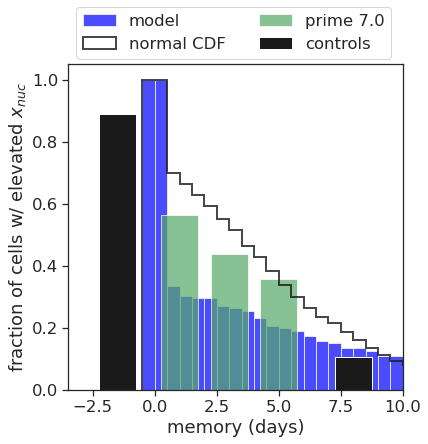

In [9]:
label = 21
ptime = 168
bins = np.arange(-0.5,20.,.5)

fig, ax = plt.subplots(1,1,figsize=(6,6))

# memory = np.load('../figures_v2/figure6_exp_fits/'+ str(ptime) +'.N127.npy') # '
memory = np.load('./noise_results_mswitch/'+ str(label) + '.P' + str(ptime) +'.N127.npy')
print(len(memory))
ax.hist(memory / 24, density=True, cumulative=-1, bins=bins, color='blue', alpha = 0.7, label='model');

expdata = pd.read_excel('../experiments/bar_plot.xlsx')

subdata = expdata.loc[expdata['prime'].isin([0,ptime])]
subdata.at[subdata['type'] == 'soft', 'relaxation time'] = 8*24 # np.amax(bins * 24) + 3*24
subdata.at[subdata['type'] == 'stiff', 'relaxation time'] = -1.5 * 24
print(subdata)

ax.bar(subdata.loc[subdata['units']=='hr','relaxation time'] / 24, subdata.loc[subdata['units']=='hr','YAP']/100.,
       width=1.5, color='g', alpha=0.7, label='prime '+str(ptime/24.))
ax.bar(subdata.loc[subdata['units']=='control','relaxation time'] / 24, subdata.loc[subdata['units']=='control','YAP']/100.,
       width=1.5, color='k', alpha=1., label='controls')
# plt.bar(subdata['relaxation time'] / 24, subdata['RUNX2']/100., color='r', alpha=0.7)

N = 1500
gausscompare = np.random.normal(np.mean(memory/24), np.std(memory/24), N)
gausscompare[gausscompare < 0.] = 0.
print(np.mean(memory/24))
print(np.std(memory/24))
print(np.std(memory/24)/np.sqrt(N))

ax.hist(gausscompare, density=True, cumulative=-1, bins=bins, label='normal CDF',
         histtype='step', alpha=0.8, color='k', linewidth=2)

ax.set_xlim([-3.5,10])
ax.set_xlabel('memory (days)')
ax.set_ylabel('fraction of cells w/ elevated $x_{nuc}$')
ax.legend(bbox_to_anchor=(0, 1.2), loc='upper left', ncol=2)

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure6/'

    fname1 = direc + "exp_compare_P"+str(ptime)+"_L"+str(label)+".png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600, transparent=True)

In [ ]:
## figure 6
## data maps for parameters, static and Energy dependent.
## spearman correlation map
## heat map for priming time, memory time, distance from m_c.

# goal: assemble different inputs, get profiles, collocate summary_stats output, make a grid of the inputs and plot.
#(probably very sensitive)

direc = './stiff_results/staticTS/'
fname = 'static_LHS_SG_SR_ng'
# fname2 = 'static_LHS_SG_SR_n4'

allDF = pd.read_csv(direc + fname +'.csv')
# allDF2 = pd.read_csv(direc + fname2 +'.csv')
input_prof = np.load(direc + fname + '_inputs.npy', allow_pickle=True)
# input_prof2 = np.load(direc + fname2 + '_inputs.npy', allow_pickle=True)

# allDF = pd.concat((allDF, allDF2))

allDF = allDF.reset_index(drop=True)
print(allDF.head(1))
print(len(allDF))
# print(input_prof.shape)
# print(input_prof)
prettylabel = {
#                         'prime_time':'$t_{prime}$', 
                        'tau_SG':'${\\tau}_{SG}$', 
                        'tau_SR':'${\\tau}_{SR}$', 
                        # 'm0':'${m}_{0}$',
                        'tau':'${\\tau}$',
                        'delta_prime':'${\Delta}_{prime}$',
                        'delta_mem':'${\Delta}_{mem}$', 
                        'delta_tot':'${\Delta}_{tot}$',
                        'n':'n'
                        }

allDF['delta_prime'] = (allDF['prime_stiff'] - allDF['m_c'] * allDF['m0']) / allDF['m0']
allDF['delta_mem'] = (allDF['m_c'] * allDF['m0'] - allDF['mem_stiff']) / allDF['m0']
allDF['delta_tot'] = allDF['delta_prime'] + allDF['delta_mem']
allDF['tm_over_tp'] = allDF['mem_time'] / allDF['prime_time']

memDF = allDF.loc[allDF['mem_time'] > 0.].loc[allDF['mem_time'].notna()]

subcols = ['tau','tau_SG','tau_SR', 'delta_prime', 'delta_mem', 'delta_tot','n'] # 'm0','tau',
fig, ax = plt.subplots(1,1,figsize=(6, 6))

mem_corr = plot_memcorr(memDF, subcols, prettylabel, ax)
mem_corr = mem_corr.iloc[mem_corr.abs().argsort()]
heat_cols = mem_corr.index.values[-2:]
print(heat_cols)

heat_cols = ['delta_prime', 'tau_SG']
fig2 = plot_groupedDF_heatmap(memDF[subcols + ['tm_over_tp']], heat_cols, prettylabel, [None, [120, 400]])

fig2.show()

saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure6/'

    fname1 = direc + "staticNG_spearman_corrs_v1.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "static_heatmap_v1.png"
    fig2.write_image(fname2, scale = 1.5, engine='kaleido')
    

In [ ]:
## figure 6
## data maps for parameters, Energy DEPENDENT

direc = './stiff_results/dynamicTS/'
# fname = 'energy_dependent_LHS_n3'
fname = 'energy_dependent_LHS_ng_all'
# fname2 = 'energy_dependent_LHS_ng2'
# fname2 = 'static_paramtest_SG_SR_tautest_n4'

allDF = pd.read_csv(direc + fname +'.csv')
# allDF2 = pd.read_csv(direc + fname2 +'.csv')
input_prof = np.load(direc + fname + '_inputs.npy', allow_pickle=True)
# input_prof2 = np.load(direc + fname2 + '_inputs.npy', allow_pickle=True)

# allDF = pd.concat((allDF, allDF2))
# input_prof = np.concatenate((input_prof, input_prof2))

allDF = allDF.reset_index(drop=True)
print(allDF.head(1))
print(len(allDF))

# allDF.to_csv('energy_dependent_LHS_ng_all'+'.csv')
# np.save('energy_dependent_LHS_ng_all'+'_inputs.npy', input_prof)

# sys.exit()


prettylabel = {
                        #'prime_time':'$t_{prime}$', 
                        'tau_R0':'${\\tau}_{SGR}$', 
                        'TV0SG':'${V}_{SG}$',
                        'TV0SR':'${V}_{SR}$',
                        'm0':'${m}_{0}$',
                        'tau':'${\\tau}$',
                        'delta_prime':'${\Delta}_{prime}$',
                        'delta_mem':'${\Delta}_{mem}$', 
                        'delta_tot':'${\Delta}_{tot}$',
                        'n':'n'
                        }

allDF['delta_prime'] = (allDF['prime_stiff'] - allDF['m_c'] * allDF['m0']) / allDF['m0']
allDF['delta_mem'] = (allDF['m_c'] * allDF['m0'] - allDF['mem_stiff']) / allDF['m0']
allDF['delta_tot'] = allDF['delta_prime'] + allDF['delta_mem']
allDF['tm_over_tp'] = allDF['mem_time'] / allDF['prime_time']

# allDF.to_csv('./stiff_results/energy_dependent_LHS_ng_addcols.csv')
# sys.exit()

memDF = allDF.loc[allDF['mem_time'] > 0.].loc[allDF['mem_time'].notna()]

# memDF[subcols].apply(lambda x: x - x.mean()/x.std(), axis=0)

subcols = ['tau', 'tau_R0', 'TV0SG', 'TV0SR', 'delta_prime', 'delta_mem', 'delta_tot', 'n'] # 'm0','tau',
# subcols = ['tau', 'tau_R0', 'TV0SG', 'TV0SR', 'delta_prime', 'delta_mem', 'delta_tot']

# memDF[subcols + ['tm_over_tp']] = memDF[subcols + ['tm_over_tp']].apply(lambda x: x - x.mean()/x.std(), axis=0)

fig, ax = plt.subplots(1,1,figsize=(7, 6))
mem_corr = plot_memcorr(memDF, subcols, prettylabel, ax)
mem_corr = mem_corr.iloc[mem_corr.abs().argsort()]
heat_cols = mem_corr.index.values[-2:]
print(heat_cols)

heat_cols = ['TV0SG', 'tau_R0']
fig2 = plot_groupedDF_heatmap(memDF[subcols + ['tm_over_tp']], heat_cols, prettylabel, [None, [150,700]])

plt.show()
fig2.show()

saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure6/'

    fname1 = direc + "energyNG_spearman_corrs_v2.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "energyNG_heatmap_v2.png"
    fig2.write_image(fname2, scale = 1.5, engine='kaleido')

In [ ]:



## test cell for failures

failU = np.load('failureU2.npy', allow_pickle=True)

print(failU)

failU = failU[0:10000]

# print(failU[0:100])
fig, ax = plt.subplots(3, 1, figsize=(6,10))

ax[0].plot(np.arange(len(failU)-1), np.abs(np.diff(failU)))
ax[0].scatter(diff_algo, np.abs(np.diff(failU))[diff_algo])

print(argrelextrema(np.abs(np.diff(failU)), np.less)[0])
print(find_peaks(-np.abs(np.diff(failU)))[0])

diff_algo = find_peaks(-np.abs(np.diff(failU)))[0]
algo = find_peaks((-failU))[0]

ax[1].plot(np.arange(len(failU)), failU)
ax[1].scatter(diff_algo, failU[diff_algo])

ax[2].plot(np.arange(len(failU)), failU)
ax[2].scatter(algo, failU[algo])


params = {}
params['tau'] = 1.
params['m0'] = 6.
params['n'] = 3
params['type'] = 'stiff'

m = 3.
a = 1.192
xUd = np.linspace(0,3,int(1e6))

x_current = 0.73

U_data = U(f_m, m, xUd, a, params)

x_args = find_peaks(-np.abs(np.diff(U_data)))[0]
x_argmin = x_args[np.abs(xUd[x_args]-x_current) == np.amin(np.abs(xUd[x_args]-x_current))]

plt.plot(xUd, U_data)
plt.scatter(xUd[x_args], U_data[x_args])